# Assignment : GDP Analysis            ***(Submitted by Sachin Katiyar)***

__Note: Data Analysis for all the questions asked in assignment is explained in "Data Analysis.pdf"__

## GDP Analysis of Indian States##
- ### PART I-A Solution ###

In [1]:
#Importing libraris such as numpy, pandas, matplotlib and seaborn for working with data and plotting graphs and charts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Setting grid style for graphs as whitegrid
sns.set_style("whitegrid")

# Note: During execution of this code, Kindly put "GDB Analysis Assignment.ipynb" and "ab40c054-5031-4376-b52e-9813e776f65e.csv"
# inside one folder. Also data and file names have not been touched and are used as present on "https://data.gov.in/" website.

# Reading file that contains data related to "GSDP" and "% Growth over previous year" for all Indian States. gsdp is the new dataframe formed.
gsdp=pd.read_csv(r"ab40c054-5031-4376-b52e-9813e776f65e.csv")

#As asked in assignment, removing data for 2016-17 duration.
gsdp=gsdp[~gsdp.Duration.str.contains('2016-17')]

#Since data for West Bengal is not present, therefore removing column related to West Bengal. Also removing all Union Territory.
gsdp=gsdp.loc[:,gsdp.columns!='West Bengal1']

#Making dataframe gspd_pGrowth from gspd which only contains data related to "% Growth over previous year" for duration 2013-14, 2014-15 and 2015-16
gsdp_pGrowth = gsdp.loc [7:,'Duration':]

#Setting Duration column as index.
gsdp_pGrowth = gsdp_pGrowth.set_index('Duration')

#Missing value treatment: Filling all NaN values with MEAN of all the values in that specific column.
#Mean is selected because we have to deal with average while moving forward in this question. Mean value will not affect column average.
gsdp_pGrowth = gsdp_pGrowth.fillna(gsdp_pGrowth.mean())

#Making necessary transforamtion i.e. transpose of gsdp_pGrowth dataframe.
gsdp_pGrowth = gsdp_pGrowth.T

#Taking mean of "percentage growth over previous year" for all the states for duration 2013-14, 2014-15 and 2015-16.
gsdp_pGrowth['Average % Growth'] = gsdp_pGrowth.mean(axis=1)

#Sorting the data in increasing order
gsdp_pGrowth=gsdp_pGrowth.sort_values(by='Average % Growth',ascending=True)

#Print the final dataframe that need to be plot for analysis.
print(gsdp_pGrowth)

Duration                   2013-14  2014-15  2015-16  Average % Growth
Goa                          -5.77    13.12   10.750          6.033333
Meghalaya                     4.87     6.41    9.580          6.953333
Odisha                       12.95    10.37    6.190          9.836667
Sikkim                       12.35     9.72    9.390         10.486667
Jammu & Kashmir              10.09     4.70   17.910         10.900000
Gujarat                      11.47    10.82   11.090         11.126667
Punjab                       12.42     9.95   11.185         11.185000
All_India GDP                12.97    10.65    9.990         11.203333
Maharashtra                  13.74     8.78   11.260         11.260000
Rajasthan                    11.27    11.37   11.320         11.320000
Jharkhand                     7.92    15.14   11.440         11.500000
Uttarakhand                  13.64     8.12   13.650         11.803333
Haryana                      15.45     9.18   10.910         11.846667
Uttar 

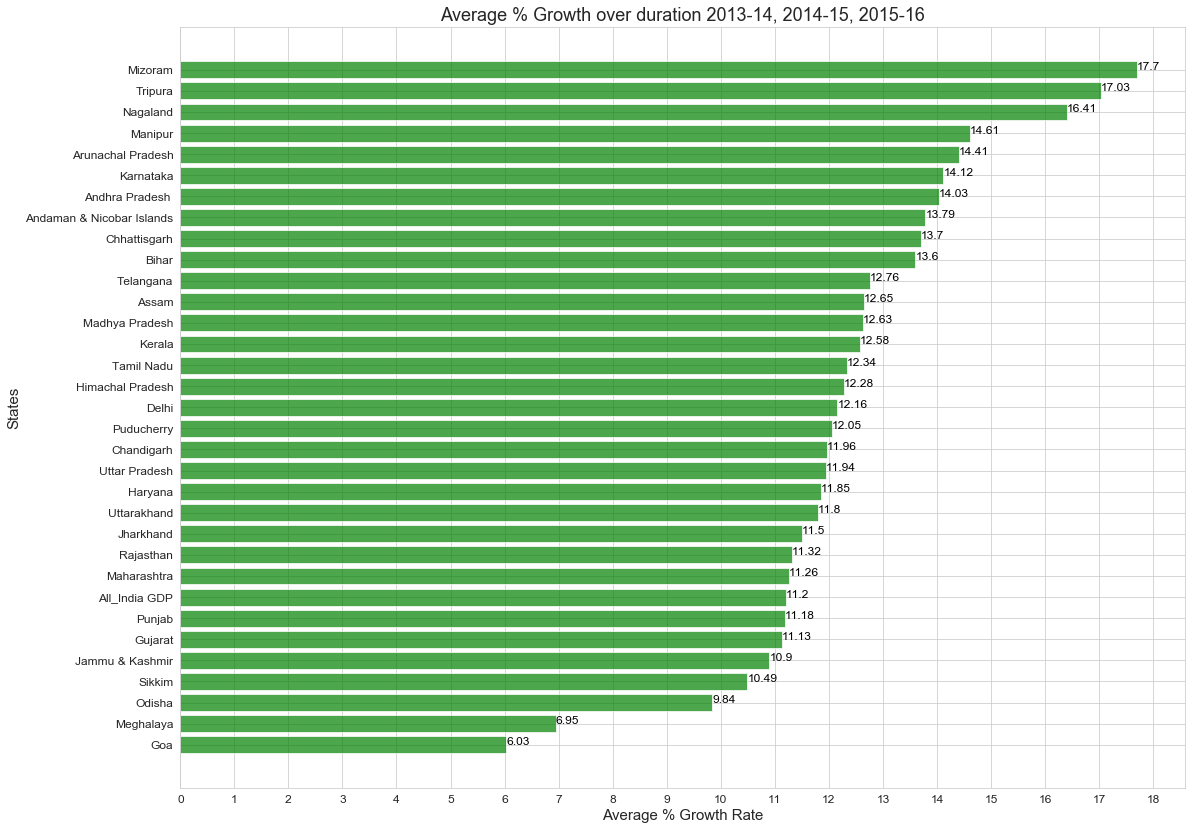

In [2]:
#Plotting horizontal bar graph for average percentage growth of all states over duration 2013-2016.
#Customizing it by setting ticks. Mentioning labels and title for the graph.
plt.figure(figsize=(18, 14))
plt.xticks(np.arange(0, max(gsdp_pGrowth['Average % Growth'])+1, step=1),fontsize=12)
plt.yticks(fontsize=12)
plt.barh(y=gsdp_pGrowth.index,width='Average % Growth',data=gsdp_pGrowth,alpha=0.7,color='green')

for i, v in enumerate(gsdp_pGrowth['Average % Growth']):
    v=round(v,2)
    plt.text(v, i, str(v), color='black',fontsize=12)
plt.xlabel("Average % Growth Rate",fontsize=15)
plt.ylabel("States",fontsize=15)
plt.title("Average % Growth over duration 2013-14, 2014-15, 2015-16",fontsize=18)
plt.show()

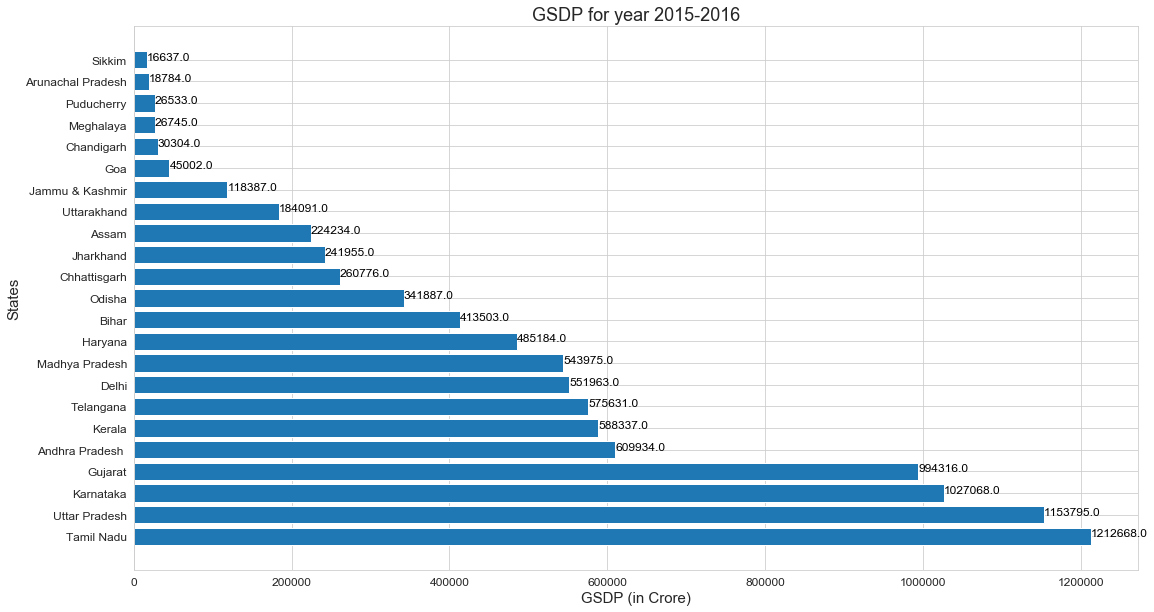

In [3]:
#Plotting total GDP of all the states for the year 2015-16.Ignoring states which donot have data for year 2015-16.
gsdp15_16 = pd.DataFrame(gsdp.iloc[4,2:-1])
gsdp15_16 = gsdp15_16.dropna()
gsdp15_16.columns=['GSPD']
gsdp15_16 = gsdp15_16.sort_values(by='GSPD',ascending=False)
(gsdp15_16)
plt.figure(figsize=(18, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.barh(y=gsdp15_16.index,width='GSPD',data=gsdp15_16);
for i, v in enumerate(gsdp15_16['GSPD']):
    v=round(v,2)
    plt.text(v, i, str(v), color='black',fontsize=12)
plt.xlabel("GSDP (in Crore)",fontsize=15)
plt.ylabel("States",fontsize=15)
plt.title("GSDP for year 2015-2016",fontsize=18)
plt.show()

- ## PART I-B Solution ##

In [4]:
#Importing GLOB module which helps in reading all csv file names present inside a folder.
import glob

#Note: All csv files needed for this part shoud be at same place as "GDB Analysis Assignment.ipynb". Here path variable contain destination path of all csv.

all_files = glob.glob("*.csv")

#Empty list used further in code.
full_data = []
header = []

#Code to read all the csv files for all the state and merge in a dataframe. Data only for year 2014-15 is used.
#Storing serial number in series for using it in upcoming questions.
for filename in all_files:
    if filename.find('GSVA')>0 and filename.find('.csv')>0:
        state = list(filename.split('-'))
        state_data=pd.read_csv(filename,encoding="ISO-8859-1")
        serial = state_data.iloc[:,0]
        state_data = state_data.iloc[:,1:]
        state_data=state_data.set_index(state_data.iloc[:,0])
        state_data=state_data.loc[:,'2014-15']
        state_data.index= state_data.index.map(lambda x: x.rstrip('*'))
        full_data.append(state_data)
        header.append(state[1])

full_dframe = pd.concat(full_data, axis=1, ignore_index=False,sort=False)
full_dframe.columns = header
full_dframe = full_dframe.T
print(full_dframe)

Item               Agriculture, forestry and fishing       Crops  Livestock  \
Andhra_Pradesh                            14819416.0   7893514.0  4309078.0   
Arunachal_Pradesh                           686117.0    415520.0    38387.0   
Assam                                      3855548.0   2890544.0   173478.0   
Bihar                                      7951890.0   4688237.0  2060296.0   
Chhattisgarh                               3948847.0   2613371.0   352208.0   
Goa                                         308507.0    140421.0    30141.0   
Gujarat                                   13769969.0   9671086.0  2698910.0   
Haryana                                    8015238.0   4636731.0  2916173.0   
Himachal_Pradesh                           1514981.0    853758.0   110304.0   
Jammu_Kashmir                              1586705.0    949424.0   433133.0   
Jharkhand                                  3211065.0   2094466.0   562503.0   
Karnataka                                 11219422.0

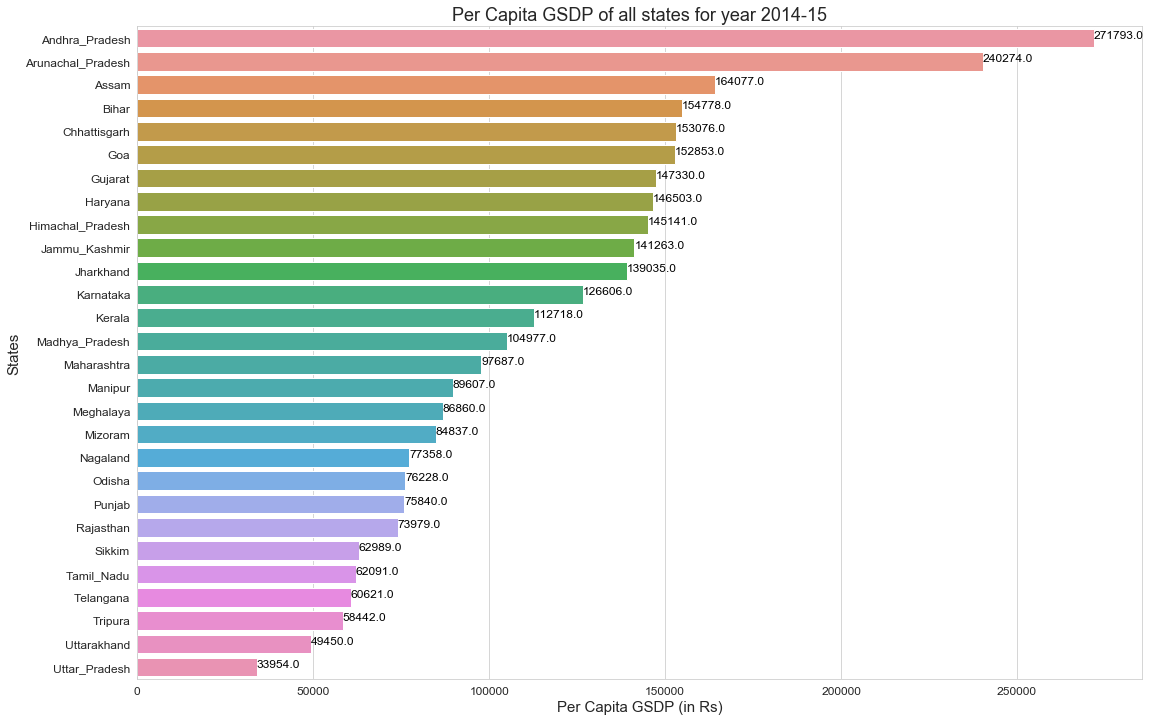

In [5]:
#Plotting graph for Per Capita GSDP of all the states for year 2014-15
GSPD_per_capita = full_dframe.sort_values(by='Per Capita GSDP (Rs.)',ascending=False)
plt.figure(figsize=(18, 12))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
k=sns.barplot(x='Per Capita GSDP (Rs.)',y=full_dframe.index,data=GSPD_per_capita)
for i, v in enumerate(GSPD_per_capita.loc[:,'Per Capita GSDP (Rs.)']):
    v=round(v,2)
    plt.text(v, i, str(v), color='black',fontsize=12)
k.set_xlabel("Per Capita GSDP (in Rs)",fontsize=15)
k.set_ylabel("States",fontsize=15)
k.set_title('Per Capita GSDP of all states for year 2014-15',fontsize=18)
plt.show()

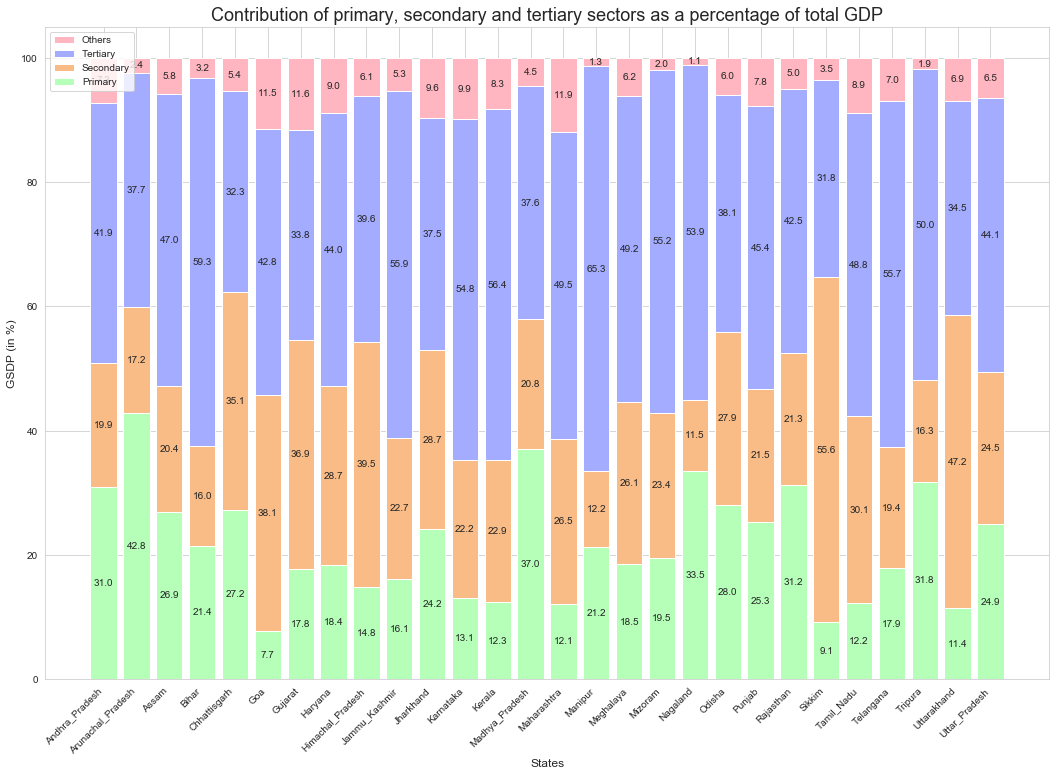

In [6]:
#Code for percentage contribution of primary, secondary and tertiary sectors as a percentage of total GDP for all the states.

#Making list and arrays to deal with the percentage of the whole
sector = ['Primary','Secondary','Tertiary','Others']
State = list(full_dframe.index)
Primary=np.array(full_dframe.loc[:,'Primary'])
Secondary=np.array(full_dframe.loc[:,'Secondary'])
Tertiary=np.array(full_dframe.loc[:,'Tertiary'])
Others=np.array(full_dframe.loc[:,'Taxes on Products']-full_dframe.loc[:,'Subsidies on products'])
GSDP = np.array(full_dframe.loc[:,'Gross State Domestic Product'])

ind = [x for x, _ in enumerate(State)]

#Defining formulas for getting percentage of the whole GSPD.
total=Primary+Secondary+Tertiary+Others
proportion_primary = np.true_divide(Primary, total) * 100
proportion_secondary = np.true_divide(Secondary, total) * 100
proportion_tertiary = np.true_divide(Tertiary, total) * 100
proportion_others = np.true_divide(Others, total) * 100

#Plotting stacked bar graph to get percentage contribution of primary, secondary and tertiary sectors as a percentage of total GDP for all the states.
plt.figure(figsize=(18, 12))
plt.bar(ind, proportion_others, width=0.8, label='Others', color='#FFB6C1',edgecolor='white',bottom=proportion_primary+proportion_secondary+proportion_tertiary)
plt.bar(ind, proportion_tertiary, width=0.8, label='Tertiary', color='#a3acff',edgecolor='white', bottom=proportion_primary+proportion_secondary)
plt.bar(ind, proportion_secondary, width=0.8, label='Secondary', color='#f9bc86' ,edgecolor='white', bottom=proportion_primary)
plt.bar(ind, proportion_primary, width=0.8, label='Primary', color='#b5ffb9',edgecolor='white' )
plt.xticks(ind, State)

#To show percentage on graph for each sector.
for xpos, ypos, yval in zip(ind, proportion_primary/2, proportion_primary):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(ind, proportion_primary+proportion_secondary/2, proportion_secondary):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(ind, proportion_primary+proportion_secondary+proportion_tertiary/2, proportion_tertiary):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(ind, proportion_primary+proportion_secondary+proportion_tertiary+proportion_others/2, proportion_others):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")

#Setting labels, titles and legend.
plt.ylabel("GSDP (in %)",fontsize=12)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("States",fontsize=12)
plt.title("Contribution of primary, secondary and tertiary sectors as a percentage of total GDP",fontsize=18)
plt.legend(loc="upper left")
plt.show()

In [7]:
#Code to categorise the states into four categories (C1, C2, C3 and C4) based on GDP per capita. Quantile values are (0.20,0.5,0.85,1)
catg=pd.DataFrame(full_dframe.loc[:,'Per Capita GSDP (Rs.)'])
catg.index.name='States'
catg.columns=['GSPD per Capita']
catg['Category']=pd.qcut(catg["GSPD per Capita"],[0,0.20,0.50,0.85,1], labels =["C4","C3","C2","C1"])
catg=catg.sort_values(by='GSPD per Capita',ascending=False)
print(catg)

                   GSPD per Capita Category
States                                     
Goa                       271793.0       C1
Sikkim                    240274.0       C1
Haryana                   164077.0       C1
Kerala                    154778.0       C1
Uttarakhand               153076.0       C1
Maharashtra               152853.0       C2
Himachal_Pradesh          147330.0       C2
Tamil_Nadu                146503.0       C2
Karnataka                 145141.0       C2
Gujarat                   141263.0       C2
Telangana                 139035.0       C2
Punjab                    126606.0       C2
Arunachal_Pradesh         112718.0       C2
Andhra_Pradesh            104977.0       C2
Mizoram                    97687.0       C3
Nagaland                   89607.0       C3
Chhattisgarh               86860.0       C3
Rajasthan                  84837.0       C3
Tripura                    77358.0       C3
Meghalaya                  76228.0       C3
Jammu_Kashmir              75840

In [8]:
#Code to find Find the top 3/4/5 sub-sectors which contribute to approx. 80% of the GSDP of each category.

#Making seperate dataframe for each category.
catg_c1=catg[catg['Category'] == 'C1']
catg_c2=catg[catg['Category'] == 'C2']
catg_c3=catg[catg['Category'] == 'C3']
catg_c4=catg[catg['Category'] == 'C4']

#subsector dataframe contain values for each subsector for all states.
subsector = full_dframe.T
subsector['SNo'] = list(serial)
subsector = subsector[~subsector.SNo.str.contains('Total')]
subsector.SNo=pd.to_numeric(subsector.SNo)
subsector = subsector.loc[subsector['SNo'].isin (range(1,12))]

#Dividing dataframe based on categories
top_sub_c1=subsector[subsector.columns.intersection(catg_c1.index)]
top_sub_c2=subsector[subsector.columns.intersection(catg_c2.index)]
top_sub_c3=subsector[subsector.columns.intersection(catg_c3.index)]
top_sub_c4=subsector[subsector.columns.intersection(catg_c4.index)]

#Logic to find top 80% contributer for category 1
sub_cat_1=top_sub_c1.sum(axis=1)
sub_cat_1=sub_cat_1.sort_values(ascending=False)
sub_cat_1_sum=sub_cat_1.sum(axis=0)
sub_cat_1_80=sub_cat_1_sum*(80/100)

tot_sum=0
for i in range(sub_cat_1.shape[0]):
    tot_sum=tot_sum+sub_cat_1[i]
    if tot_sum>sub_cat_1_80:
        break

sub_cat_1=pd.DataFrame(sub_cat_1)        
sub_cat_1=sub_cat_1.iloc[:i,:]
sub_cat_1.columns=['C1_Total']
print("\nTop sub-sectors in C1 Category which contribute to approx 80% of the GSPD")
print(sub_cat_1)

#Logic to find top 80% contributer for category 2
sub_cat_2=top_sub_c2.sum(axis=1)
sub_cat_2=sub_cat_2.sort_values(ascending=False)
sub_cat_2_sum=sub_cat_2.sum(axis=0)
sub_cat_2_80=sub_cat_2_sum*(80/100)

tot_sum=0
for i in range(sub_cat_2.shape[0]):
    tot_sum=tot_sum+sub_cat_2[i]
    if tot_sum>sub_cat_2_80:
        break

sub_cat_2=pd.DataFrame(sub_cat_2)        
sub_cat_2=sub_cat_2.iloc[:i,:]
sub_cat_2.columns=['C2_Total']
print("\nTop sub-sectors in C2 Category which contribute to approx 80% of the GSPD")
print(sub_cat_2)

#Logic to find top 80% contributer for category 3
sub_cat_3=top_sub_c3.sum(axis=1)
sub_cat_3=sub_cat_3.sort_values(ascending=False)
sub_cat_3_sum=sub_cat_3.sum(axis=0)
sub_cat_3_80=sub_cat_3_sum*(80/100)

tot_sum=0
for i in range(sub_cat_3.shape[0]):
    tot_sum=tot_sum+sub_cat_3[i]
    if tot_sum>sub_cat_3_80:
        break

sub_cat_3=pd.DataFrame(sub_cat_3)        
sub_cat_3=sub_cat_3.iloc[:i,:]
sub_cat_3.columns=['C3_Total']
print("\nTop sub-sectors in C3 Category which contribute to approx 80% of the GSPD")
print(sub_cat_3)

#Logic to find top 80% contributer for category 4
sub_cat_4=top_sub_c4.sum(axis=1)
sub_cat_4=sub_cat_4.sort_values(ascending=False)
sub_cat_4_sum=sub_cat_4.sum(axis=0)
sub_cat_4_80=sub_cat_4_sum*(80/100)

tot_sum=0
for i in range(sub_cat_4.shape[0]):
    tot_sum=tot_sum+sub_cat_4[i]
    if tot_sum>sub_cat_4_80:
        break

sub_cat_4=pd.DataFrame(sub_cat_4)        
sub_cat_4=sub_cat_4.iloc[:i,:]
sub_cat_4.columns=['C4_Total']
print("\nTop sub-sectors in C4 Category which contribute to approx 80% of the GSPD")
print(sub_cat_4)


Top sub-sectors in C1 Category which contribute to approx 80% of the GSPD
                                                      C1_Total
Item                                                          
Manufacturing                                       19625045.0
Agriculture, forestry and fishing                   15993232.0
Trade, repair, hotels and restaurants               15738265.0
Real estate, ownership of dwelling & profession...  15571552.0
Construction                                        12607184.0

Top sub-sectors in C2 Category which contribute to approx 80% of the GSPD
                                                       C2_Total
Item                                                           
Manufacturing                                       108002544.0
Real estate, ownership of dwelling & profession...   95695548.0
Agriculture, forestry and fishing                    88427015.0
Trade, repair, hotels and restaurants                63729156.0
Construction             

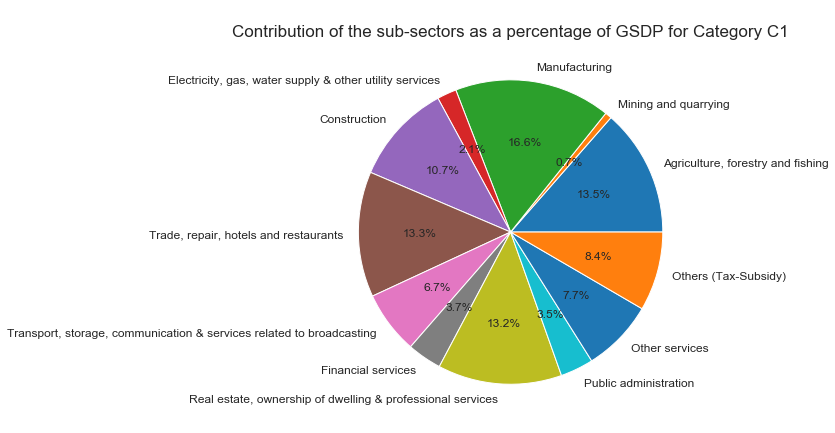

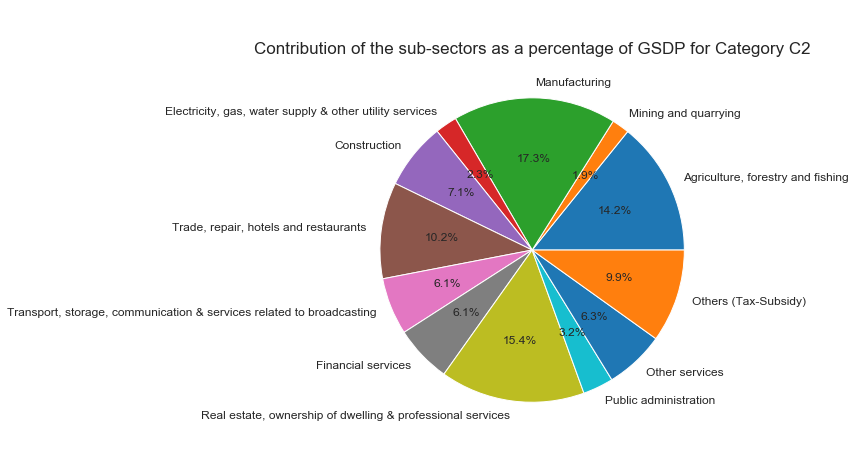

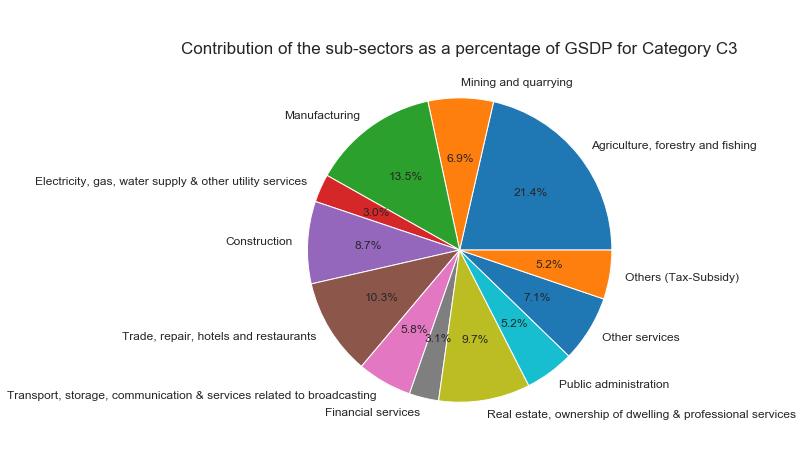

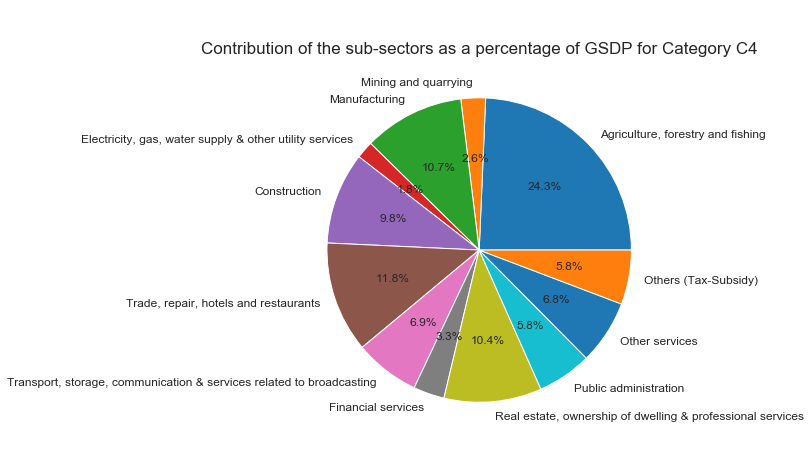

In [9]:
#Code to plot the contribution of the sub-sectors as a percentage of the GSDP of each category.  

#Dividing dataframe based on category.
subsec_all = full_dframe.T
subsec_all['SNo'] = list(serial)
subsec_all = subsec_all[~subsec_all.SNo.str.contains('Total')]
subsec_all.SNo=pd.to_numeric(subsec_all.SNo)
subsec_all = subsec_all.loc[subsec_all['SNo'].isin (range(1,full_dframe.shape[0]))]
Category_1=subsec_all[subsec_all.columns.intersection(catg_c1.index)].copy()
Category_2=subsec_all[subsec_all.columns.intersection(catg_c2.index)].copy()
Category_3=subsec_all[subsec_all.columns.intersection(catg_c3.index)].copy()
Category_4=subsec_all[subsec_all.columns.intersection(catg_c4.index)].copy()

#Modifying dataframe such that it will contain only sub-sectors for category C1 and plot PIE chart based on the same.
Category_1['Total']=Category_1.sum(axis=1)
Category_1=Category_1.T
Category_1['Others (Tax-Subsidy)']=Category_1['Taxes on Products']-Category_1['Subsidies on products']
Category_1=Category_1.drop(Category_1.loc[:,'TOTAL GSVA at basic prices':'Per Capita GSDP (Rs.)'],axis=1)
label=Category_1.columns
plt.figure(figsize=(7, 7))
plt.pie(Category_1.loc['Total'],labels=label,autopct='%.1f%%',textprops={'fontsize': 12});
plt.title('\nContribution of the sub-sectors as a percentage of GSDP for Category C1',fontsize=17);

#Modifying dataframe such that it will contain only sub-sectors for category C2 and plot PIE chart based on the same.
Category_2['Total']=Category_2.sum(axis=1)
Category_2=Category_2.T
Category_2['Others (Tax-Subsidy)']=Category_2['Taxes on Products']-Category_2['Subsidies on products']
Category_2=Category_2.drop(Category_2.loc[:,'TOTAL GSVA at basic prices':'Per Capita GSDP (Rs.)'],axis=1)
label=Category_2.columns
plt.figure(figsize=(7, 7))
plt.pie(Category_2.loc['Total'],labels=label,autopct='%.1f%%',textprops={'fontsize': 12});
plt.title('\n\nContribution of the sub-sectors as a percentage of GSDP for Category C2',fontsize=17);

#Modifying dataframe such that it will contain only sub-sectors for category C3 and plot PIE chart based on the same.
Category_3['Total']=Category_3.sum(axis=1)
Category_3=Category_3.T
Category_3['Others (Tax-Subsidy)']=Category_3['Taxes on Products']-Category_3['Subsidies on products']
Category_3=Category_3.drop(Category_3.loc[:,'TOTAL GSVA at basic prices':'Per Capita GSDP (Rs.)'],axis=1)
label=Category_3.columns
plt.figure(figsize=(7, 7))
plt.pie(Category_3.loc['Total'],labels=label,autopct='%.1f%%',textprops={'fontsize': 12});
plt.title('\n\nContribution of the sub-sectors as a percentage of GSDP for Category C3',fontsize=17);

#Modifying dataframe such that it will contain only sub-sectors for category C4 and plot PIE chart based on the same.
Category_4['Total']=Category_4.sum(axis=1)
Category_4=Category_4.T
Category_4['Others (Tax-Subsidy)']=Category_4['Taxes on Products']-Category_4['Subsidies on products']
Category_4=Category_4.drop(Category_4.loc[:,'TOTAL GSVA at basic prices':'Per Capita GSDP (Rs.)'],axis=1)
label=Category_4.columns
plt.figure(figsize=(7, 7))
plt.pie(Category_4.loc['Total'],labels=label,autopct='%.1f%%',textprops={'fontsize': 12});
plt.title('\n\nContribution of the sub-sectors as a percentage of GSDP for Category C4',fontsize=17);

## GDP and Education Drop-out Rates##
- ### Part-II Solution ###

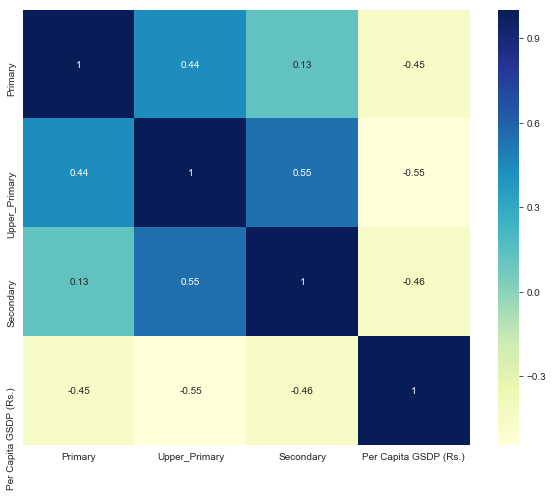

In [10]:
#Code to plot correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for the states
# Note: During execution of this code, Kindly put "GDB Analysis Assignment.ipynb" and "rs_session243_au570_1.1.csv" inside one folder.

#Reading csv file that contain dropout rates for different level of education.
df_dropout=pd.read_csv(r"rs_session243_au570_1.1.csv")

#Selecting only 2014-15 data for analysis and putting it into a dataframe.
df_dropout=df_dropout.loc[:,['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]
df_dropout.columns=['States','Primary','Upper_Primary','Secondary']

#Replacing state names as dataframe df_dropout and full_dframe pointing same state with different name. Eg: Uttar Pradesh -> Uttar_Pradesh
df_dropout['States']=df_dropout['States'].replace(['Uttar Pradesh','Andhra Pradesh','Arunachal Pradesh','Chhatisgarh','Himachal Pradesh','Jammu and Kashmir','Madhya Pradesh','Tamil Nadu','Uttrakhand'],['Uttar_Pradesh','Andhra_Pradesh','Arunachal_Pradesh','Chhattisgarh','Himachal_Pradesh','Jammu_Kashmir','Madhya_Pradesh','Tamil_Nadu','Uttarakhand'])

#Inner merge (join) on both dataframe to get per capita gsdp values in df_dropout dataframe.
df_dropout=pd.merge(df_dropout, full_dframe['Per Capita GSDP (Rs.)'], how='inner', on='States')

#Calculation the correlation values using corr function and plotting the same.
#Note: No need to remove NaN values as they are already handled by corr function (it excludes NaN values).
correl = df_dropout.corr()
round(correl, 3)
plt.figure(figsize=(10,8))
sns.heatmap(correl, cmap="YlGnBu", annot=True)
plt.show()